In [30]:
import pandas as pd
import numpy as np
# from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import re
import os
from sklearn.preprocessing import MultiLabelBinarizer


In [31]:
ratings = pd.read_csv('/home/manishn/recommend/data/ml-latest-small/ratings.csv')
movies = pd.read_csv('/home/manishn/recommend/data/ml-latest-small/movies.csv')

In [32]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

mlb = MultiLabelBinarizer()
genre_indicators = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_, index=movies.index)

# Step 2: Add genre indicators to movies dataset
movies_with_genres = pd.concat([movies.drop('genres', axis=1), genre_indicators], axis=1)

# Step 3: Merge the movies with ratings dataset on movieId
movies_ratings_genres = pd.merge(ratings, movies_with_genres, on='movieId')



In [33]:
movies_ratings_genres

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,Hazard (2005),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,Blair Witch (2016),0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [54]:
data=pd.DataFrame()
data=movies_ratings_genres
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

/tmp/ipykernel_3038644/943713701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


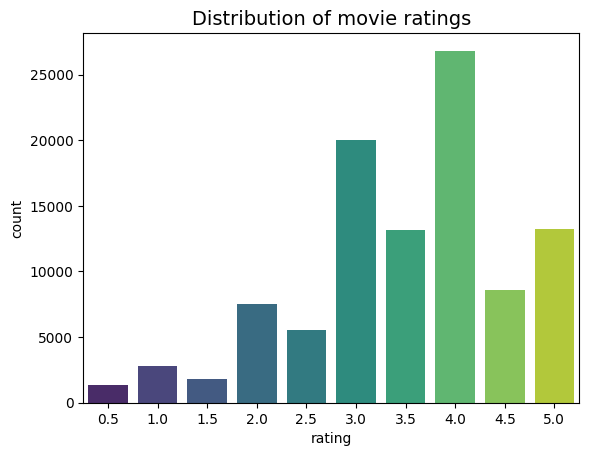

In [37]:
import seaborn as sns
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()


In [4]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")


Mean global rating: 3.5.
Mean rating per user: 3.66.


In [5]:
merged = pd.merge(ratings, movies, on='movieId')
merged= merged[['userId', 'movieId', 'title', 'genres', 'rating', 'timestamp']]
merged.to_csv('merged_ratings.csv', index=False)
merged

,userId,movieId,title,genres,rating,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962
2,7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946
3,15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970
4,17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483
...,...,...,...,...,...,...
100831,610,160341,Bloodmoon (1997),Action|Thriller,2.5,1479545749
100832,610,160527,Sympathy for the Underdog (1971),Action|Crime|Drama,4.5,1479544998
100833,610,160836,Hazard (2005),Action|Drama|Thriller,3.0,1493844794
100834,610,163937,Blair Witch (2016),Horror|Thriller,3.5,1493848789


In [44]:
# data=pd.read_csv('/home/manishn/recommend/data/ml-latest-small/ratings.csv')
data.head()
MatrixData=data.drop(['timestamp','genres','title'], axis=1)
MovieUserMatrix = MatrixData.pivot_table(index='movieId',columns='userId',values='rating')
MovieUserMatrix.head()
MovieUserMatrix_Y=MovieUserMatrix.fillna(-1)
MovieUserMatrix_Y
MovieUserMatrix_R=MovieUserMatrix.copy()
MovieUserMatrix_R=MovieUserMatrix_R.where(~MovieUserMatrix_R.notna(), 1)
MovieUserMatrix_R=MovieUserMatrix_R.fillna(0)
MovieUserMatrix_R
Y=MovieUserMatrix_Y.values #converting to numpy array
R=MovieUserMatrix_R.values
Y

array([[ 4. , -1. , -1. , ...,  2.5,  3. ,  5. ],
       [-1. , -1. , -1. , ...,  2. , -1. , -1. ],
       [ 4. , -1. , -1. , ...,  2. , -1. , -1. ],
       ...,
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ]])

In [6]:
MatrixData=data.drop(['timestamp','genres','title'], axis=1)
MovieUserMatrix = MatrixData.pivot_table(index='movieId',columns='userId',values='rating')
MovieUserMatrix.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
MovieUserMatrix_Y=MovieUserMatrix.fillna(-1)
MovieUserMatrix_Y


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,-1.0,-1.0,-1.0,4.0,-1.0,4.5,-1.0,-1.0,-1.0,...,4.0,-1.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,4.0,-1.0,-1.0,...,-1.0,4.0,-1.0,5.0,3.5,-1.0,-1.0,2.0,-1.0,-1.0
3,4.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
193583,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
193585,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [46]:
MovieUserMatrix_R=MovieUserMatrix.copy()
MovieUserMatrix_R=MovieUserMatrix_R.where(~MovieUserMatrix_R.notna(), 1)
MovieUserMatrix_R=MovieUserMatrix_R.fillna(0)
MovieUserMatrix_R


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
Y=MovieUserMatrix_Y.values #converting to numpy array
R=MovieUserMatrix_R.values
Y

array([[ 4. , -1. , -1. , ...,  2.5,  3. ,  5. ],
       [-1. , -1. , -1. , ...,  2. , -1. , -1. ],
       [ 4. , -1. , -1. , ...,  2. , -1. , -1. ],
       ...,
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ]])

**Dataset**

In [48]:
import numpy as np

def train_test_split(Y, R, test_size=0.2, random_state=None):
    """
    Train and test split for user-item interaction matrix and binary indicator matrix.
    
    Parameters
    ----------
    Yratings: numpy array-like
        User-item interaction matrix of shape (m, n) where m = users, n = movies
    Rratings: numpy array-like
        Binary-valued indicator matrix of shape (m, n) indicating whether a rating is present (1) or not (0)
    test_size: float
        Proportion of the dataset to include in the test split (default is 0.2)
    random_state: int or None
        Random seed for reproducibility (default is None)
    
    Returns
    -------
    Ytrain: numpy array-like
        Train user-item interaction matrix
    Ytest: numpy array-like
        Test user-item interaction matrix
    Rtrain: numpy array-like
        Train binary indicator matrix for user-item interactions
    Rtest: numpy array-like
        Test binary indicator matrix for user-item interactions
    """
    
    # Set random seed for reproducibility if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Get the indices of the rated items
    rated_indices = np.argwhere(R == 1)  # Get indices where Rratings is 1

    # Shuffle the indices randomly
    np.random.shuffle(rated_indices)

    # Calculate the number of test samples
    total_test_size = int(len(rated_indices) * test_size)

    # Split the indices into train and test sets
    test_indices = rated_indices[:total_test_size]
    train_indices = rated_indices[total_test_size:]

    # Initialize the train and test matrices
    Ytrain = np.zeros_like(Y)
    Ytest = np.zeros_like(Y)
    Rtrain = np.zeros_like(R)
    Rtest = np.zeros_like(R)

    # Populate the train and test matrices
    for index in train_indices:
        Ytrain[index[0], index[1]] = Y[index[0], index[1]]
        Rtrain[index[0], index[1]] = 1  # Mark this as rated in Rtrain

    for index in test_indices:
        Ytest[index[0], index[1]] = Y[index[0], index[1]]
        Rtest[index[0], index[1]] = 1  # Mark this as rated in Rtest

    return Ytrain, Ytest, Rtrain, Rtest


**Collaborative filtering:(Used to learn Features for movies)**


In [49]:
#Implementation of Collaborative filtering Cost function and gradient, regularized and non regularized
def  cofiCostFunc(all_parameters_vector, Y, R, num_users, num_movies, num_features, Lambda):
    """
            calculates Collaborative filtering Cost function and gradient both regularized and non regularized
            
            Parameters
            ----------
            total_parameters: numpy array-like
                    initial values for users parameter vectors and movies feature vectors
            
            Y: numpy array-like
                    user-item interaction matrix
            R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
            num_users: int-like
                    total number of users
            num_movies: int-like
                    total number of movies
            Lambda: Float-like
                    Regularization parameter
                    
            Returns
            -------
            J:Float-like
                    Cost
            grad:Float-like
                    Gradient
            reg_J:Float-like
                    Regularized Cost
            reg_grad:Float-like
                    Regularized gradient
    """
    # Unfold the params
    U = all_parameters_vector[:num_movies*num_features].reshape(num_movies,num_features)
    V = all_parameters_vector[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  np.dot(U,V.T)
    err = (predictions - Y)
    loss = 1/2 * np.sum((err**2) * R) # multiplying by R will consider only those values for which value of (i,j)=r(i,j)=1
    
    #compute regularized cost function
    reg_U =  Lambda/2 * np.sum(U**2)
    reg_V = Lambda/2 *np.sum(U**2)
    reg_loss = loss + reg_U + reg_V

    
    # Compute gradient
    U_grad = np.dot(err*R,V)
    V_grad = np.dot((err*R).T,U)
    gradients = np.append(U_grad.flatten(),V_grad.flatten()) #flattening calculated gradients of 4*3 dim into 12 real number one dim of vector for optimization algo since optimization algorithms deals with vectos not matrix 
    
    # Compute regularized gradient
    reg_X_grad = U_grad + Lambda*U
    reg_Theta_grad = V_grad + Lambda*V
    reg_gradients = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    #, reg_J, reg_grad
    
    return loss, gradients, reg_loss, reg_gradients




In [55]:
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar

def gradientDescent(initial_parameters, Y, R, num_users, num_movies, num_features, alpha, num_iters, Lambda):
    """
    Optimize X and Theta
    
    Parameters
    ----------
    initial_parameters: numpy array-like
        Initial values for users parameter vectors and movies feature vectors
    
    Y: numpy array-like
        User-item interaction matrix
    R: numpy array-like
        Binary-valued indicator matrix for user-item interaction matrix
    num_users: int-like
        Total number of users
    num_movies: int-like
        Total number of movies
    alpha: Float-like
        Learning rate
    num_iters: integer-like
        Number of iterations of optimization algorithm
    Lambda: Float-like
        Regularization parameter
        
    Returns
    -------
    paramsFinal: numpy-array-like
        Learned user parameters and feature vectors for movies
    J_history: numpy-array-like
        History of decrease in cost as gradient descent moves towards global minima
    """
    # Unfold the parameters
    U = initial_parameters[:num_movies * num_features].reshape(num_movies, num_features)
    V = initial_parameters[num_movies * num_features:].reshape(num_users, num_features)
    
    loss_history = []
    
    # Wrap the loop with tqdm for progress tracking
    for _ in tqdm(range(num_iters), desc="Training Progress"):
        params = np.append(U.flatten(), V.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        # Unfold grad
        U_grad = grad[:num_movies * num_features].reshape(num_movies, num_features)
        V_grad = grad[num_movies * num_features:].reshape(num_users, num_features)
        
        U -= alpha * U_grad
        V -= alpha * V_grad
        loss_history.append(cost)
    
    paramsFinal = np.append(U.flatten(), V.flatten())
    return paramsFinal, loss_history


In [56]:
import numpy as np

def normalizeRatings(Y, R):
    """
    Normalize Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    
    Parameters
    ----------
    Y: numpy array-like
        User-item interaction matrix of shape (m, n) where m = movies, n = users
    R: numpy array-like
        Binary-valued indicator matrix of shape (m, n) indicating whether a rating is present (1) or not (0)

    Returns
    -------
    Ynorm: numpy array-like
        Normalized Y of shape (m, n)
    Ymean: numpy array-like
        Mean of ratings for each user of shape (n, 1)
    """
    
    n, m = Y.shape  # Get the number of movies (n) and users (m)
    Ymean = np.zeros((m, 1))  # Mean ratings for each user
    Y_normalised = np.zeros((n, m))   # Normalized ratings matrix

    for j in range(m):  # Iterate over each user
        # Get indices of rated movies for each user j
        rated_indices = np.where(R[:, j] == 1)[0]   #rated_indices_vector 
        
        if len(rated_indices) > 0:  # Check if there are any rated movies
            # Calculate mean rating for rated movies only
            Ymean[j] = np.sum(Y[rated_indices, j]) / len(rated_indices)
            # Normalize ratings for the rated movies
            Y_normalised[rated_indices, j] = Y[rated_indices, j] - Ymean[j]
        else:
            Ymean[j] = 0  # Set mean to 0 if no ratings exist for the user

    return Y_normalised, Ymean


In [57]:
Y.shape

(9724, 610)

In [58]:
Y_normalised,_=normalizeRatings(Y,R)
Y_normalised.shape

(9724, 610)

In [59]:
#Train-Test split
Ytrain, Ytest, Rtrain, Rtest = train_test_split(Y,R)
num_users = Ytrain.shape[1]
num_movies = Ytrain.shape[0]
num_features = 200


# Set initial Parameters (Theta,X)
U = np.random.randn(num_movies, num_features)
V = np.random.randn(num_users, num_features)


initial_parameters = np.append(U.flatten(),V.flatten())
Lambda = 10

# learns Features for movies and parameters for all users using Collaborative filtering
final_parameter, cost_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,1000,Lambda)



Training Progress: 100%|██████████| 1000/1000 [18:17<00:00,  1.10s/it]


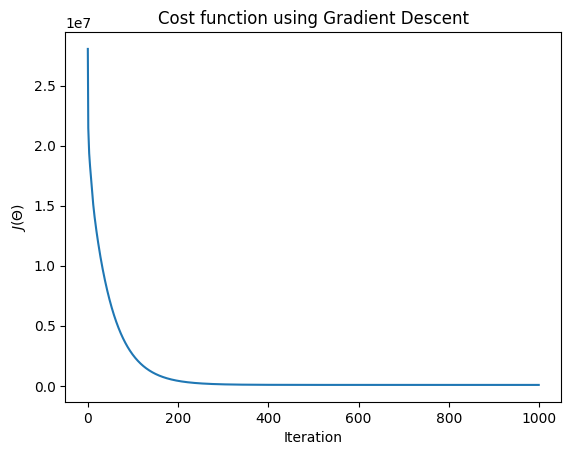

In [103]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
U = final_parameter[:num_movies*num_features].reshape(num_movies,num_features)
V = final_parameter[num_movies*num_features:].reshape(num_users,num_features)


#**prediction of  using this matrix**

In [61]:
predicted=np.dot(U,V.T)

In [62]:
predicted.shape

(9724, 610)

In [63]:
import numpy as np

def computeTestError(Y_test, R_test, Y_pred):
    """
    Compute the error on the test set by comparing predicted and actual ratings.
    
    Parameters
    ----------
    Y_test: numpy array-like
        The actual ratings in the test set of shape (m, n)
    R_test: numpy array-like
        Binary-valued indicator matrix of shape (m, n) indicating whether a test rating is present (1) or not (0)
    Y_pred: numpy array-like
        The predicted ratings of shape (m, n)
    
    Returns
    -------
    error: float
        The root mean squared error (RMSE) between the predicted and actual ratings
    """
    error = (Y_pred - Y_test) * R_test  # Only consider entries where R_test == 1
    
    
    squared_error = np.square(error)
    
    mse = np.sum(squared_error) / np.count_nonzero(R_test)
    
    return np.sqrt(mse)

# Compute RMSE
rmse = computeTestError(Ytest, Rtest,predicted)
print(f"Test RMSE: {rmse}")


Test RMSE: 1.2490076499692166


In [34]:
Y[0]

array([ 4. , -1. , -1. , -1. ,  4. , -1. ,  4.5, -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. ,  2.5, -1. ,  4.5,  3.5,  4. , -1. ,  3.5, -1. ,
       -1. , -1. , -1. , -1. ,  3. , -1. , -1. , -1. ,  5. ,  3. ,  3. ,
       -1. , -1. , -1. , -1. , -1. , -1. ,  5. , -1. , -1. ,  5. ,  3. ,
        4. ,  5. , -1. , -1. , -1. ,  3. , -1. , -1. , -1. ,  3. , -1. ,
       -1. ,  5. , -1. , -1. , -1. , -1. , -1. ,  5. ,  4. , -1. ,  4. ,
       -1. ,  2.5, -1. , -1. ,  5. , -1. ,  4.5, -1. , -1. ,  0.5, -1. ,
        4. , -1. , -1. , -1. ,  2.5, -1. , -1. , -1. ,  4. , -1. , -1. ,
        3. ,  3. ,  4. , -1. ,  3. , -1. , -1. ,  5. , -1. ,  4.5, -1. ,
       -1. , -1. , -1. ,  4. , -1. , -1. , -1. ,  4. , -1. , -1. , -1. ,
       -1. ,  3. , -1. , -1. , -1. , -1. , -1. , -1. ,  3.5, -1. ,  4. ,
       -1. , -1. ,  4. , -1. , -1. , -1. , -1. , -1. ,  3. , -1. ,  2. ,
       -1. ,  3. ,  4. , -1. ,  4. , -1. , -1. ,  3. ,  4. , -1. , -1. ,
        3.5,  5. , -1. , -1. , -1. , -1. , -1. ,  5

In [40]:
predicted_ = np.clip(predicted, 1, 5)  # Assuming ratings range from 1 to 5
predicted_[0].min()

1.10041015447532

In [64]:
import numpy as np

# Assuming 'predicted' is your predicted ratings matrix
predicted = np.dot(U, V.T)  # Your predicted ratings

# Calculate the min and max of the predicted ratings
pred_min = np.min(predicted)
pred_max = np.max(predicted)

# Set your desired range
min_range = 1
max_range = 5

# Normalize to the range [1, 5]
normalized_predicted = min_range + (predicted - pred_min) * (max_range - min_range) / (pred_max - pred_min)

# Optional: Clip to ensure no values exceed the bounds (in case of numerical issues)
normalized_predicted = np.clip(normalized_predicted, min_range, max_range)

# Now normalized_predicted contains ratings in the range [1, 5]
normalized_predicted.min()

# Compute RMSE
rmse = computeTestError(Ytest, Rtest,normalized_predicted)
print(f"Test RMSE: {rmse}")


Test RMSE: 1.0924774456541073


In [77]:
U.shape

(9724, 200)

**Content Based Filtering**

In [74]:
def computeCost(X, y, theta):
    """
    Calculates the cost for given value of θ.
    
    Parameters
    ----------
    X: numpy-array-like
        Matrix of features for all movies.
        
    y: numpy-array-like
        Binary vector of user movie ratings.
        
    theta: numpy-array-like
        Value of θ for a user.
        
    Returns
    -------
    j: float
        Cost.
    """
    m = y.size
    s = np.dot(X, theta) - y
    j = (1/(2*m)) * np.dot(s.T, s)  # Consider changing to binary cross-entropy for binary ratings
    return j


In [75]:
# def CBgradientDescent(U, y, theta, alpha, num_iters):
#     """
#     Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
#     gradient steps with learning rate `alpha`.
    
#     Parameters
#     ----------
#     U : array_like
#         matrix of features for all movies
    
#     y : array_like
#         binary vector of ∈ R^9742 movies where 9742 is the number of movies rated or not 
    
#     theta : array_like
#         Initial values for the web-applicaiton user parameters. 
    
#     alpha : float
#         The learning rate.
    
#     num_iters : int
#         The number of iterations for gradient descent. 
    
#     Returns
#     -------
#     theta : array_like
#         The learned parameters. 
#     """
#     m = float(y.shape[0])
#     theta = theta.copy()
#     for i in range(num_iters):
#         theta=(theta)-(alpha/m)*(np.dot(np.transpose((np.dot(U,theta)-y)),U))
#     return theta


In [80]:

def CBgradientDescent(U, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    U : array_like
        Matrix of features for all movies.
    
    y : array_like
        Binary vector of ratings.
    
    theta : array_like
        Initial values for user parameters.
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned parameters. 
    """
    m = float(y.shape[0])
    theta = theta.copy()  # Ensure the original theta is not modified
    for i in range(num_iters):
        error = np.dot(U, theta) - y  # Prediction errors
        theta -= (alpha/m) * np.dot(U.T, error)  # Update theta
    return theta


In [85]:

def prediction(X, my_ratings, moviesdataset):
    """
    Performs prediction for movie recommendations based on user ratings and movie features.
    
    Parameters
    ----------
    X : array_like
        A matrix of features for all movies (shape: m x d), where m is the number of movies and d is the number of features.
    
    my_ratings : numpy-array-like
        A binary vector of movie ratings provided by the user (shape: m), where 1 indicates the movie is rated and 0 indicates it is not.
                    
    moviesdataset : pandas DataFrame
        A DataFrame containing movie information (movieId, title, etc.) for all m movies.
    
    Returns
    -------
    sorted_data : DataFrame
        The top-N recommended movies sorted by predicted ratings.
    """
    
    # Extract the ratings provided by the user, ignoring the un-rated movies
    out_arr = my_ratings[np.nonzero(my_ratings)]  # Shape: (k,), where k is the number of rated movies
    out_arr = out_arr.reshape(-1, 1)               # Reshape to (k, 1) for compatibility with other operations

    # Get the indices of the rated movies
    idx = np.where(my_ratings)[0]                  # Shape: (k,)
    
    # Collect the features of the rated movies
    X_1 = [X[x] for x in idx]                      # List of shape (k, d), where d is the number of features
    X_1 = np.array(X_1)                            # Convert to NumPy array, shape: (k, d)
    
    # Reshape the ratings for compatibility
    y = out_arr                                     # Shape: (k, 1)
    y = np.reshape(y, -1)                           # Reshape to (k,) for gradient descent

    # Perform gradient descent to learn the parameters (theta) based on the rated movies
    theta = CBgradientDescent(X_1, y, np.zeros((200)), 0.001, 4000)
    # Here, theta will have shape: (n,) after optimization
    # print(theta)
    # Predict ratings for all movies using learned parameters
    p = X @ theta.T                                 # Shape: (m,) where m is the number of movies
    p = np.reshape(p, -1)                           # Ensure p is a 1D array

    # Prepare the predicted data for sorting
    predictedData = moviesdataset.copy()            # Create a copy of the original DataFrame
    predictedData['Prediction'] = p                 # Add predicted ratings to the DataFrame

    # Sort the DataFrame based on predicted ratings in descending order
    sorted_data = predictedData.sort_values(by=['Prediction'], ascending=False)
    
    # Return the top 10 recommended movies
    return sorted_data[:10]                         # Shape: (10, p+1), where p is the number of columns in moviesdataset



In [100]:
#cleaning and transforming moviesDataset to use it on web-application 
moviesdataset=merged.drop(['userId','rating','timestamp','genres'],axis=1)
moviesdataset=moviesdataset.drop_duplicates()
moviesdataset=moviesdataset.sort_values("movieId")
moviesdataset=moviesdataset.reset_index(drop=True)
moviesdataset["title"] = moviesdataset["title"].str.lower() 
moviesdataset["title"] = moviesdataset["title"].str.replace(r"\(.*\)","")
moviesdataset.head()

my_ratings = np.zeros((9724,1))



In [102]:

# # test rating user
# my_ratings[0] = 4 
# my_ratings[97] = 2
# my_ratings[6] = 3
# my_ratings[11]= 5
# my_ratings[53] = 4
# my_ratings[63]= 5
# my_ratings[65]= 3
# my_ratings[68] = 5
# my_ratings[82]= 4
# my_ratings[225] = 5
# my_ratings[354]= 5
my_ratings[277]=5
print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for Movie")
        print((moviesdataset.iloc[i]).title)
# top-N-movies
# my_ratings
prediction(U,my_ratings,moviesdataset)

New user ratings:

Rated 5 for Movie
shawshank redemption, the (1994)


,movieId,title,Prediction
277,318,"shawshank redemption, the (1994)",5.000000
314,356,forrest gump (1994),3.566781
461,527,schindler's list (1993),3.512108
46,50,"usual suspects, the (1995)",3.403529
97,110,braveheart (1995),3.380814
257,296,pulp fiction (1994),3.211282
510,593,"silence of the lambs, the (1991)",3.167858
123,150,apollo 13 (1995),3.110441
43,47,seven (a.k.a. se7en) (1995),3.062967
398,457,"fugitive, the (1993)",3.048078


In [93]:
my_ratings.shape

(9724, 1)

In [88]:
prediction(U,my_ratings,moviesdataset)

,movieId,title,Prediction
314,356,forrest gump (1994),5.240658
277,318,"shawshank redemption, the (1994)",5.139992
461,527,schindler's list (1993),5.092192
510,593,"silence of the lambs, the (1991)",4.979419
0,1,toy story (1995),4.904978
322,364,"lion king, the (1994)",4.883285
506,588,aladdin (1992),4.801392
32,34,babe (1995),4.796318
33,36,dead man walking (1995),4.772354
3617,4973,"amelie (fabuleux destin d'amélie poulain, le) ...",4.763207


In [60]:
# def learningCurve(Ytrain,Rtrain,Ytest,Rtest):
#     """
#     compute data for learning Curve
                    
#     Parameters
#     -------
#     Ytrain: numpy array-like
#                    train user-item interaction matrix
#     Ytest:  numpy array-like
#                    test user-item interaction matrix
#     Rtrain: numpy array-like
#                    train its a binary-valued indicator matrix for user-item interaction matrix
#     Rtest:  numpy array-like
#                    test its a binary-valued indicator matrix for user-item interaction matrix
                   
#     Returns
#     -------
    
#     train_size_hist: numpy array-like
#                    different training set sizes used
#     train_score_hist: numpy array-like
#                    scores relative to training size
#     test_size_hist: numpy array-like
#                    different test set sizes used
#     test_score_hist: numpy array-like
#                    scores relative to training size
    
#     """
#     Y=Ytrain
#     R=Rtrain
#     test_Y=Ytest
#     test_R=Rtest
#     train_size_hist=[]
#     train_score_hist=[]
#     test_size_hist=[]
#     test_score_hist=[]
#     size_list=[1,100,800,1000,1500,2000,2500,3000,3300,3800,4800,5900,6500,7000,7600,8300,9724]
#     for size in size_list:
#         Ytrain=Y[:size]
#         Rtrain=R[:size]
#         Ytest=test_Y[:size]
#         Rtest=test_R[:size]
#         num_users = Ytrain.shape[1]
#         num_movies = Ytrain.shape[0]
#         num_features = 100

#         # Set initial Parameters (Theta,X)
#         X = np.random.randn(num_movies, num_features)
#         Theta = np.random.randn(num_users, num_features)
#         initial_parameters = np.append(X.flatten(),Theta.flatten())
#         Lambda = 10

#         # Optimize parameters using Gradient Descent
#         paramsFinal, J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,1000,Lambda)
#         X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
#         Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)
#         pred = X @ Theta.T
#         pred=pred*Rtrain
#         actual=Ytrain
#         train_size_hist.append(size)
#         train_score_hist.append(get_mse(pred, actual))
#         pred = X @ Theta.T
#         pred=pred*Rtest
#         actual=Ytest
#         test_size_hist.append(size)
#         test_score_hist.append(get_mse(pred, actual))
#     return train_size_hist,train_score_hist,test_size_hist,test_score_hist


In [61]:
# train_size_hist,train_score_hist,test_size_hist,test_score_hist=learningCurve(Ytrain,Rtrain,Ytest,Rtest)


In [62]:
# plt.style.use('seaborn')
# plt.plot(train_size_hist, train_score_hist, label = 'Training error')
# plt.plot(train_size_hist, test_score_hist, label = 'Validation error')
# plt.ylabel('MSE', fontsize = 14)
# plt.yticks(np.arange(0,2, 0.25))
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for a Collaborative Filtering', fontsize = 18, y = 1.03)
# plt.legend()
# plt.ylim(0.97,1.05)


In [70]:
#cleaning and transforming moviesDataset to use it on web-application 
moviesdataset=merged.drop(['userId','rating','timestamp','genres'],axis=1)
moviesdataset=moviesdataset.drop_duplicates()
moviesdataset=moviesdataset.sort_values("movieId")
moviesdataset=moviesdataset.reset_index(drop=True)
moviesdataset["title"] = moviesdataset["title"].str.lower() 
moviesdataset["title"] = moviesdataset["title"].str.replace(r"\(.*\)","")
moviesdataset.head()



,movieId,title
0,1,toy story (1995)
1,2,jumanji (1995)
2,3,grumpier old men (1995)
3,4,waiting to exhale (1995)
4,5,father of the bride part ii (1995)


In [71]:
moviesdataset.shape

(9724, 2)

In [72]:
my_ratings = np.zeros((9724,1))

# test rating user
my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for Movie")
        print((moviesdataset.iloc[i]).title)


New user ratings:

Rated 4 for Movie
toy story (1995)
Rated 3 for Movie
sabrina (1995)
Rated 5 for Movie
dracula: dead and loving it (1995)
Rated 4 for Movie
indian in the cupboard, the (1995)
Rated 5 for Movie
fair game (1995)
Rated 3 for Movie
misérables, les (1995)
Rated 5 for Movie
screamers (1995)
Rated 4 for Movie
vampire in brooklyn (1995)
Rated 2 for Movie
braveheart (1995)
Rated 5 for Movie
little women (1994)
Rated 5 for Movie
above the rim (1994)


In [69]:
predicted

In [73]:
# top-N-movies
prediction(U,my_ratings,moviesdataset)


ValueError: shapes (11,200) and (100,) not aligned: 200 (dim 1) != 100 (dim 0)

In [62]:
# # Mean Absolute Error (MAE): Indicates the average absolute difference between predicted and actual ratings. A lower MAE indicates better model performance.
# # Root Mean Square Error (RMSE): Gives a higher penalty to larger errors, useful for understanding how much predictions deviate from actual ratings.
# Mean Absolute Error (MAE): 1.0183
# Interpretation: On average, the predicted ratings deviate from the actual ratings by approximately 1.02 units. This means that, for each rating, your model's predictions are off by a bit over one point. While this is a relatively low MAE, the acceptability depends on the rating scale (e.g., if ratings are from 1 to 5, this deviation might be considered acceptable).
# Root Mean Square Error (RMSE): 1.3916
# Interpretation: RMSE, which penalizes larger errors more than MAE, suggests that the predicted ratings have a standard deviation of about 1.39 units from the actual ratings. Like MAE, a lower RMSE indicates better predictive accuracy. RMSE provides a more sensitive measure when you have larger discrepancies in ratings.


In [106]:
theta=V[0]
theta.shape

(200,)

In [107]:
p = U @ theta.T                                 # Shape: (m,) where m is the number of movies
p = np.reshape(p, -1)                           # Ensure p is a 1D array

    # Prepare the predicted data for sorting
predictedData = moviesdataset.copy()            # Create a copy of the original DataFrame
predictedData['Prediction'] = p                 # Add predicted ratings to the DataFrame

    # Sort the DataFrame based on predicted ratings in descending order
sorted_data = predictedData.sort_values(by=['Prediction'], ascending=False)
    
    # Return the top 10 recommended movies
sorted_data[:10]                         # Shape: (10, p+1), where p is the number of columns in moviesdataset


,movieId,title,Prediction
895,1193,one flew over the cuckoo's nest (1975),5.597732
659,858,"godfather, the (1972)",5.448747
277,318,"shawshank redemption, the (1994)",5.407262
974,1276,cool hand luke (1967),5.330960
4131,5952,"lord of the rings: the two towers, the (2002)",5.327128
960,1262,"great escape, the (1963)",5.312503
474,541,blade runner (1982),5.270059
921,1221,"godfather: part ii, the (1974)",5.260795
4791,7153,"lord of the rings: the return of the king, the...",5.247809
840,1104,"streetcar named desire, a (1951)",5.244985
